# Multiple Linear Regression Model

In [17]:
# Installations
# !pip install keras
# !pip install tensorflow
# !pip install sklearn --upgrade
# !pip install joblib

In [6]:
import warnings
warnings.simplefilter('ignore')

# Load dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the same starting seed number for numpy.random so the results are reproducible
from numpy.random import seed
seed(42)

## Basic Data Cleaning

In [41]:
# Read and clean the data
# filepath = os.path.join('..','resources','WDI_csv','WDIData.csv')
filepath = os.path.join('..','resources','primary_indicators.csv')
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,country_name,indicator_name,year,value,hdi
0,14,South Asia,"Agriculture, forestry, and fishing, value adde...",1990,2.691710e+01,0.441
1,100,South Asia,GDP (current US$),1990,4.072274e+11,0.441
2,103,South Asia,GDP per capita (current US$),1990,3.592669e+02,0.441
3,159,South Asia,"Life expectancy at birth, total (years)",1990,5.814480e+01,0.441
4,333,South Asia,"Population, total",1990,1.133495e+09,0.441


In [42]:
# Pivot table with indicators/features as column names
pivot_df = df.pivot_table(index=["country_name","year","hdi"], columns=["indicator_name"], values=["value"])

# Flatten pivot table
pivot_df.columns = pivot_df.columns.to_series().str.join(' ')
pivot_df.reset_index(inplace=True)

# Rename columns
pivot_df = pivot_df.rename(columns={"value Agriculture, forestry, and fishing, value added (% of GDP)": "Agriculture (% GDP)",
                                    "value Employers, total (% of total employment) (modeled ILO estimate)": "Employment (%)",
                                    "value GDP (current US$)": "GDP (USD)",
                                    "value GDP per capita (current US$)": "GDP per capita",
                                    "value Life expectancy at birth, total (years)": "Life expectancy",
                                    "value GNI per capita, Atlas method (current US$)": "GNI per capita",
                                    "value Population, total": "Population"})

# Drop rows with null values
print(pivot_df.shape)
pivot_df = pivot_df.dropna()
print(pivot_df.shape)
# pivot_df.drop(pivot_df[pivot_df.hdi == ".."].index, inplace=True)
print(pivot_df.shape)

pivot_df["hdi"] = pivot_df["hdi"].astype('float')

pivot_df.reset_index(inplace=True)
pivot_df.head()

(4395, 10)
(3583, 10)
(3583, 10)


,index,country_name,year,hdi,Agriculture (% GDP),Employment (%),GDP (USD),GDP per capita,GNI per capita,Life expectancy,Population
0,19,Afghanistan,2009,0.447,29.297501,0.497,1.243909e+10,438.076034,450.0,60.484,28394813.0
1,20,Afghanistan,2010,0.464,26.210069,0.490,1.585657e+10,543.303042,510.0,61.028,29185507.0
2,21,Afghanistan,2011,0.465,23.743664,0.493,1.780428e+10,591.162346,530.0,61.553,30117413.0
3,22,Afghanistan,2012,0.479,24.390874,0.499,2.000162e+10,641.872034,630.0,62.054,31161376.0
4,23,Afghanistan,2013,0.485,22.810663,0.496,2.056105e+10,637.165044,660.0,62.525,32269589.0


In [44]:
# Specify indicator(s)
indicators = ["Life expectancy",
              "Agriculture (% GDP)",
              "GDP per capita",
              "Population",
              "GNI per capita",
              "Employment (%)"]

# Initialize features array
X = []

# For each row in the df
for row in range(len(pivot_df)):

    point = []

    # Append each indicator value to the data point
    for i in range(len(indicators)):
        point.append(pivot_df[indicators[i]][row])
        
    # Append the row to the features array
    X.append(point)

X

[[60.484,
  29.2975010547259,
  438.076034406941,
  28394813.0,
  450.0,
  0.497000008821487],
 [61.028,
  26.2100685374552,
  543.303041863931,
  29185507.0,
  510.0,
  0.490000009536743],
 [61.553,
  23.743663987754307,
  591.16234645088,
  30117413.0,
  530.0,
  0.493000000715256],
 [62.054,
  24.390873626371,
  641.872033785411,
  31161376.0,
  630.0,
  0.499000012874603],
 [62.525,
  22.8106627361766,
  637.16504385598,
  32269589.0,
  660.0,
  0.4959999918937679],
 [62.966,
  22.137041371957398,
  613.856332882312,
  33370794.0,
  630.0,
  0.497999995946884],
 [63.377,
  20.6343227166798,
  578.466352941708,
  34413603.0,
  600.0,
  0.5019999742507929],
 [63.76300000000001,
  21.0810862110389,
  547.228110150363,
  35383128.0,
  570.0,
  0.505999982357025],
 [64.13,
  20.466505165881,
  556.302138508508,
  36296400.0,
  550.0,
  0.509999990463257],
 [72.495,
  36.4107030664902,
  1009.9776675210601,
  3168033.0,
  890.0,
  2.7660000324249303],
 [72.83800000000002,
  31.5433425577

In [45]:
# Flatten the data into arrays
X = np.array(X)

y = np.array(pivot_df["hdi"])
y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(3583, 6)
(3583, 1)


## Plot the Data

In [46]:
# fig, ax = plt.subplots()
# ax.scatter(X, y)
# plt.xlabel(indicator)
# plt.ylabel("HDI")
# plt.show()

## Data Preprocessing for ML

In [47]:
# Split into Test and Train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
# Scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [49]:
# Transform the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Creating the Model

### Multiple Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Create the model using LinearRegression
linear = LinearRegression()

# Train the model
linear.fit(X_train_scaled, y_train_scaled)

# Use our model to make predictions
predictions = linear.predict(X_test_scaled)

# Score the model
# training_score = model.score(X_train_scaled, y_train_scaled)
# testing_score = model.score(X_test_scaled, y_test_scaled)
r2 = linear.score(X_test_scaled, y_test_scaled)
mse = mean_squared_error(y_test_scaled, predictions)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
# print(f"Linear Coefficient: {linear.coef_[0][0]}")
# print(f"y-Axis Intercept: {linear.intercept_[0]}")

R2 Score: 0.9121219321000048
Mean Squared Error (MSE): 0.08522192087712159


### Predicting HDI value

In [52]:
feed_values = [60.48, 29.3, 438.07, 28394813, 450, 0.497]

X_scaled = X_scaler.transform([feed_values])
y_scaled = linear.predict(X_scaled)
predicted_y = y_scaler.inverse_transform(y_scaled)
predicted_HDI = predicted_y[0][0]

predicted_HDI

0.48802349769036824

### Plot the Model

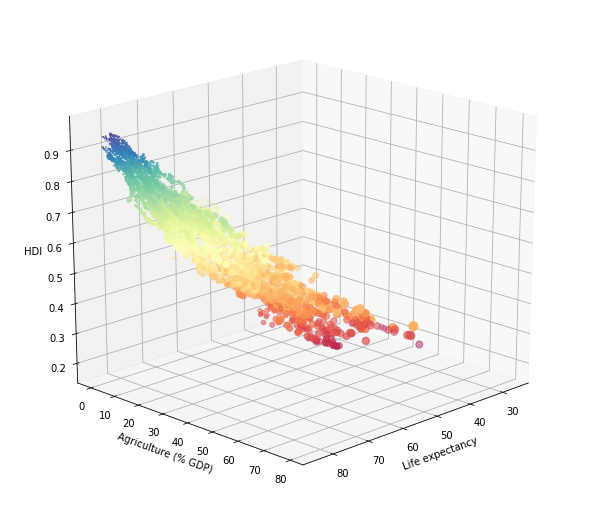

In [71]:
# # Plot the model
# x_min = np.array([[X_train_scaled.min()]])
# x_max = np.array([[X_train_scaled.max()]])
# y_min = linear.predict(x_min)
# y_max = linear.predict(x_max)
# plt.scatter(X_train_scaled, y_train_scaled, c='blue')
# plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
# plt.title("Linear Regression Model")
# plt.xlabel(f"{indicator} (Scaled)")
# plt.ylabel("HDI (Scaled)")
# plt.show()

# create some fake data
X = np.array(pivot_df['Life expectancy'])
Y = np.array(pivot_df['Agriculture (% GDP)'])
Z = np.array(pivot_df['hdi'])




from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 7))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X, Y, Z, s=Y, c=Z, cmap=plt.cm.get_cmap("Spectral"))
axes.set_xlabel('Life expectancy')
axes.set_ylabel('Agriculture (% GDP)')
axes.set_zlabel('HDI')
plt.show()

### Plot the Residuals

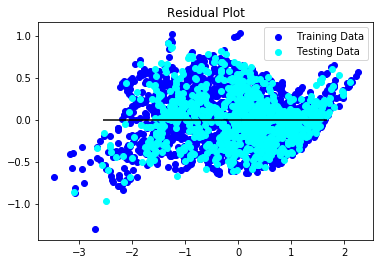

In [72]:
# # Plot the residuals
# y_train_predict = linear.predict(X_train_scaled)
# y_test_predict = linear.predict(X_test_scaled)
# y_train_residual = linear.predict(X_train_scaled) - y_train_scaled
# y_test_residual = linear.predict(X_test_scaled) - y_test_scaled

# plt.scatter(y_train_predict, y_train_residual, c="blue", label="Training Data")
# plt.scatter(y_test_predict, y_test_residual, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_train_predict.min(), xmax=y_train_predict.max())
# plt.title("Residual Plot")
# plt.xlabel("Prediction")
# plt.ylabel("Residual")
# plt.show()
plt.scatter(linear.predict(X_train_scaled), linear.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(linear.predict(X_test_scaled), linear.predict(X_test_scaled) - y_test_scaled, c="aqua", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()